# Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [7]:
# Importing data
data = pd.read_csv(r"C:/Users/Ashif/Downloads/Wine_clust .csv")

# Exploratory Data Analysis

In [8]:
# Viewing data.head()
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [10]:
# Checking for any null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

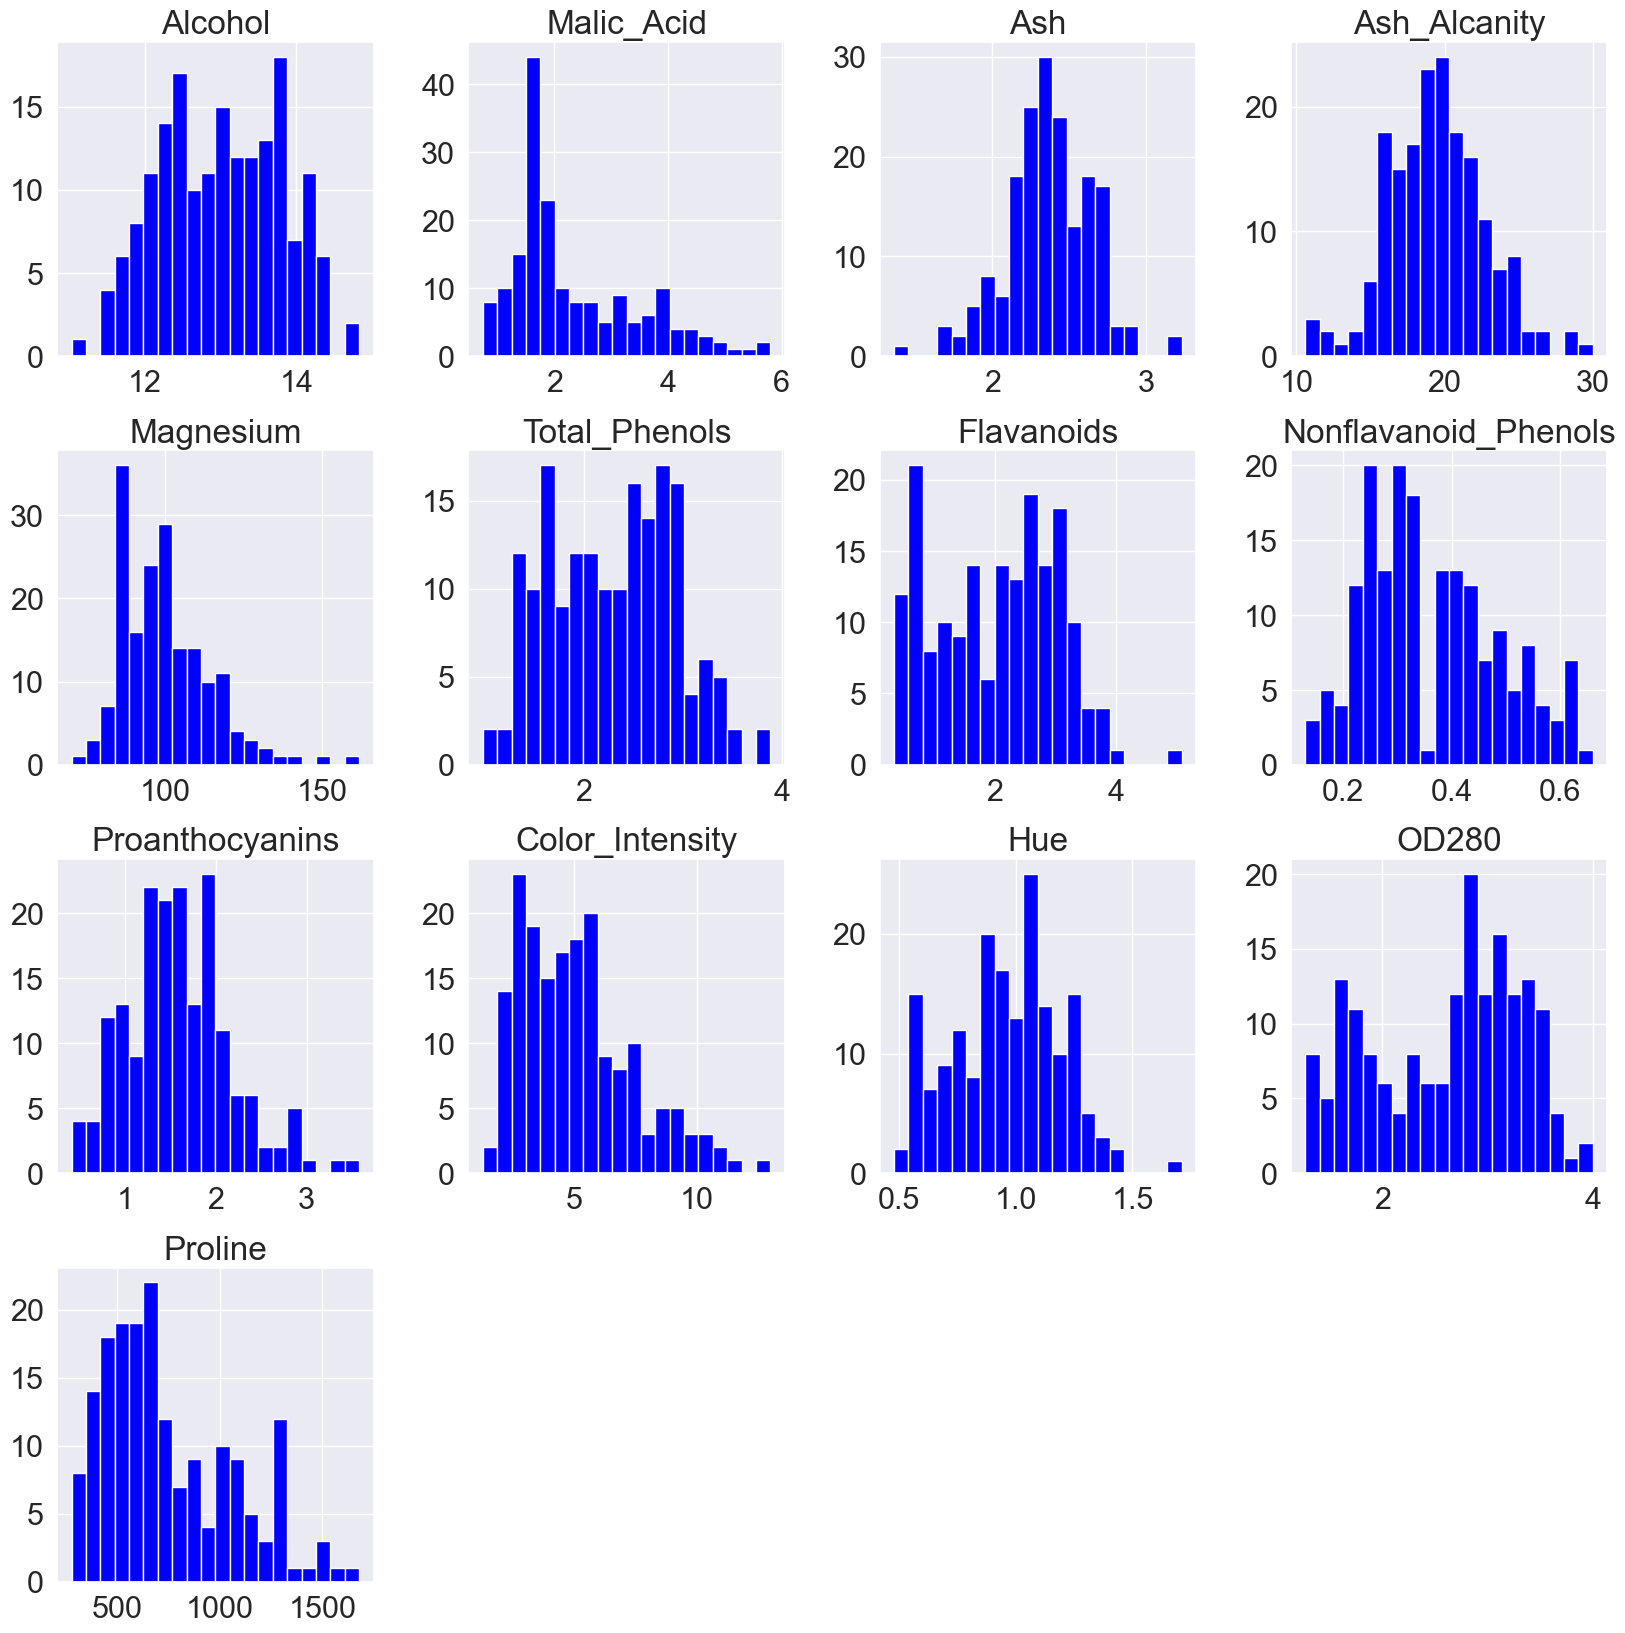

In [11]:
# Creating histograms of features to view data distribution
sns.set(style='darkgrid',font_scale=2, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue' )

In [12]:
# Checking the skew of the data
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

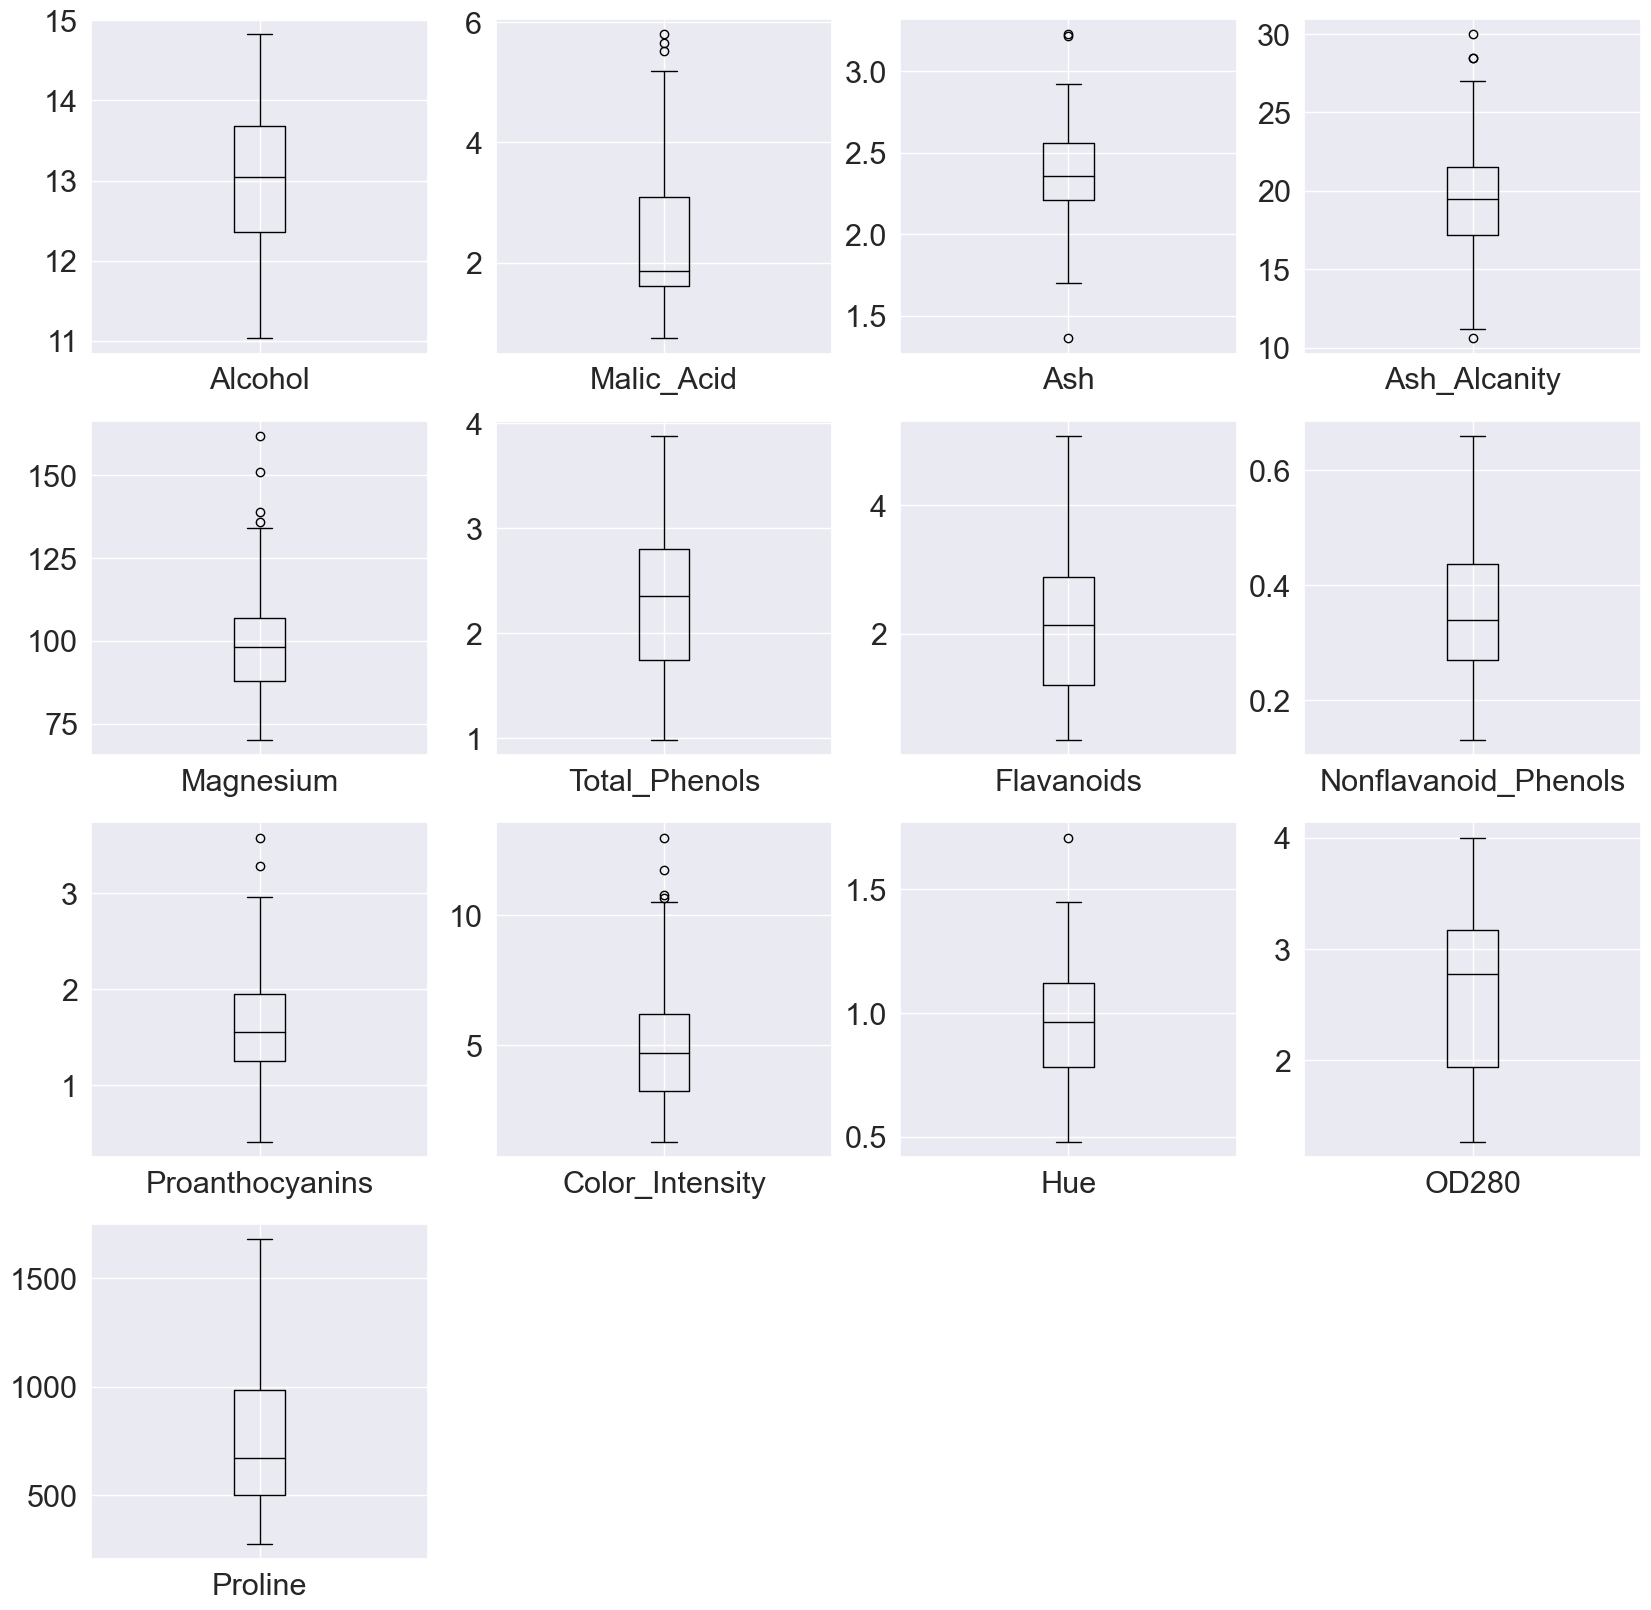

In [13]:
# Plotting the distribution of data with boxplots
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

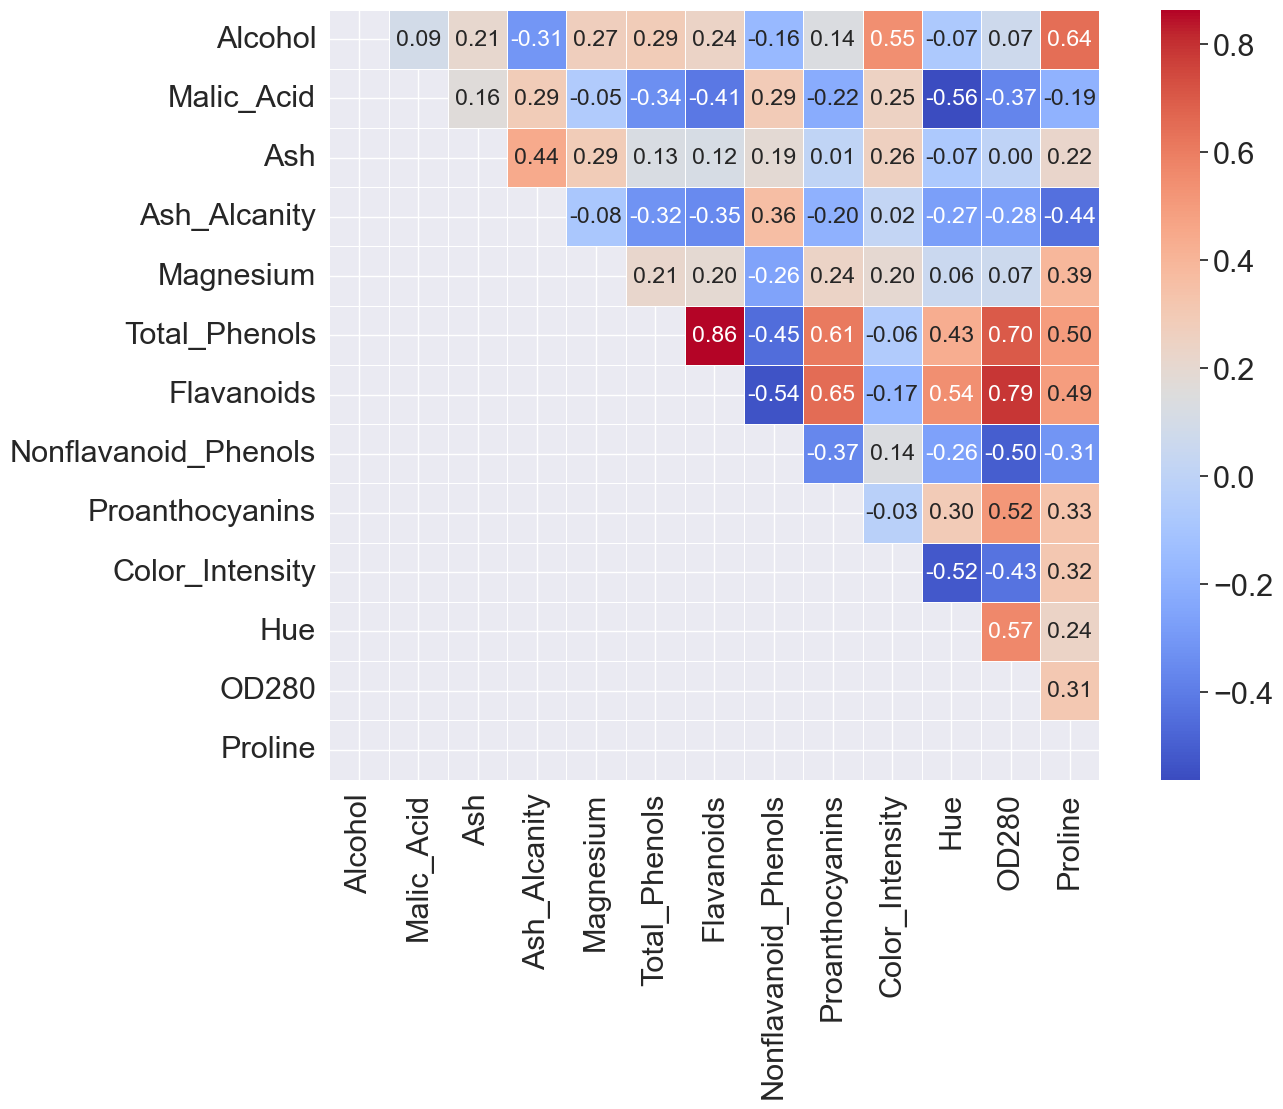

In [14]:
# Creating a heatmap of feature correlation
plt.figure(figsize=(16, 10))
mask = np.tril(data.corr())
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt='.2f', annot_kws={'size': 'x-small'}, linewidths=0.5, square=True, mask=mask);

# Data Preprocessing

In [15]:
# Applying StandardScaler()
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# PCA

In [16]:
# Applying PCA, n_components = 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print('Shape after PCA: ', pca_data.shape)
print('Original shape: ', data_scaled.shape)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Shape after PCA:  (178, 2)
Original shape:  (178, 13)
Cumulative variance explained by 2 principal components: 55.41%


Text(0.5, 1.0, 'PCA Plot')

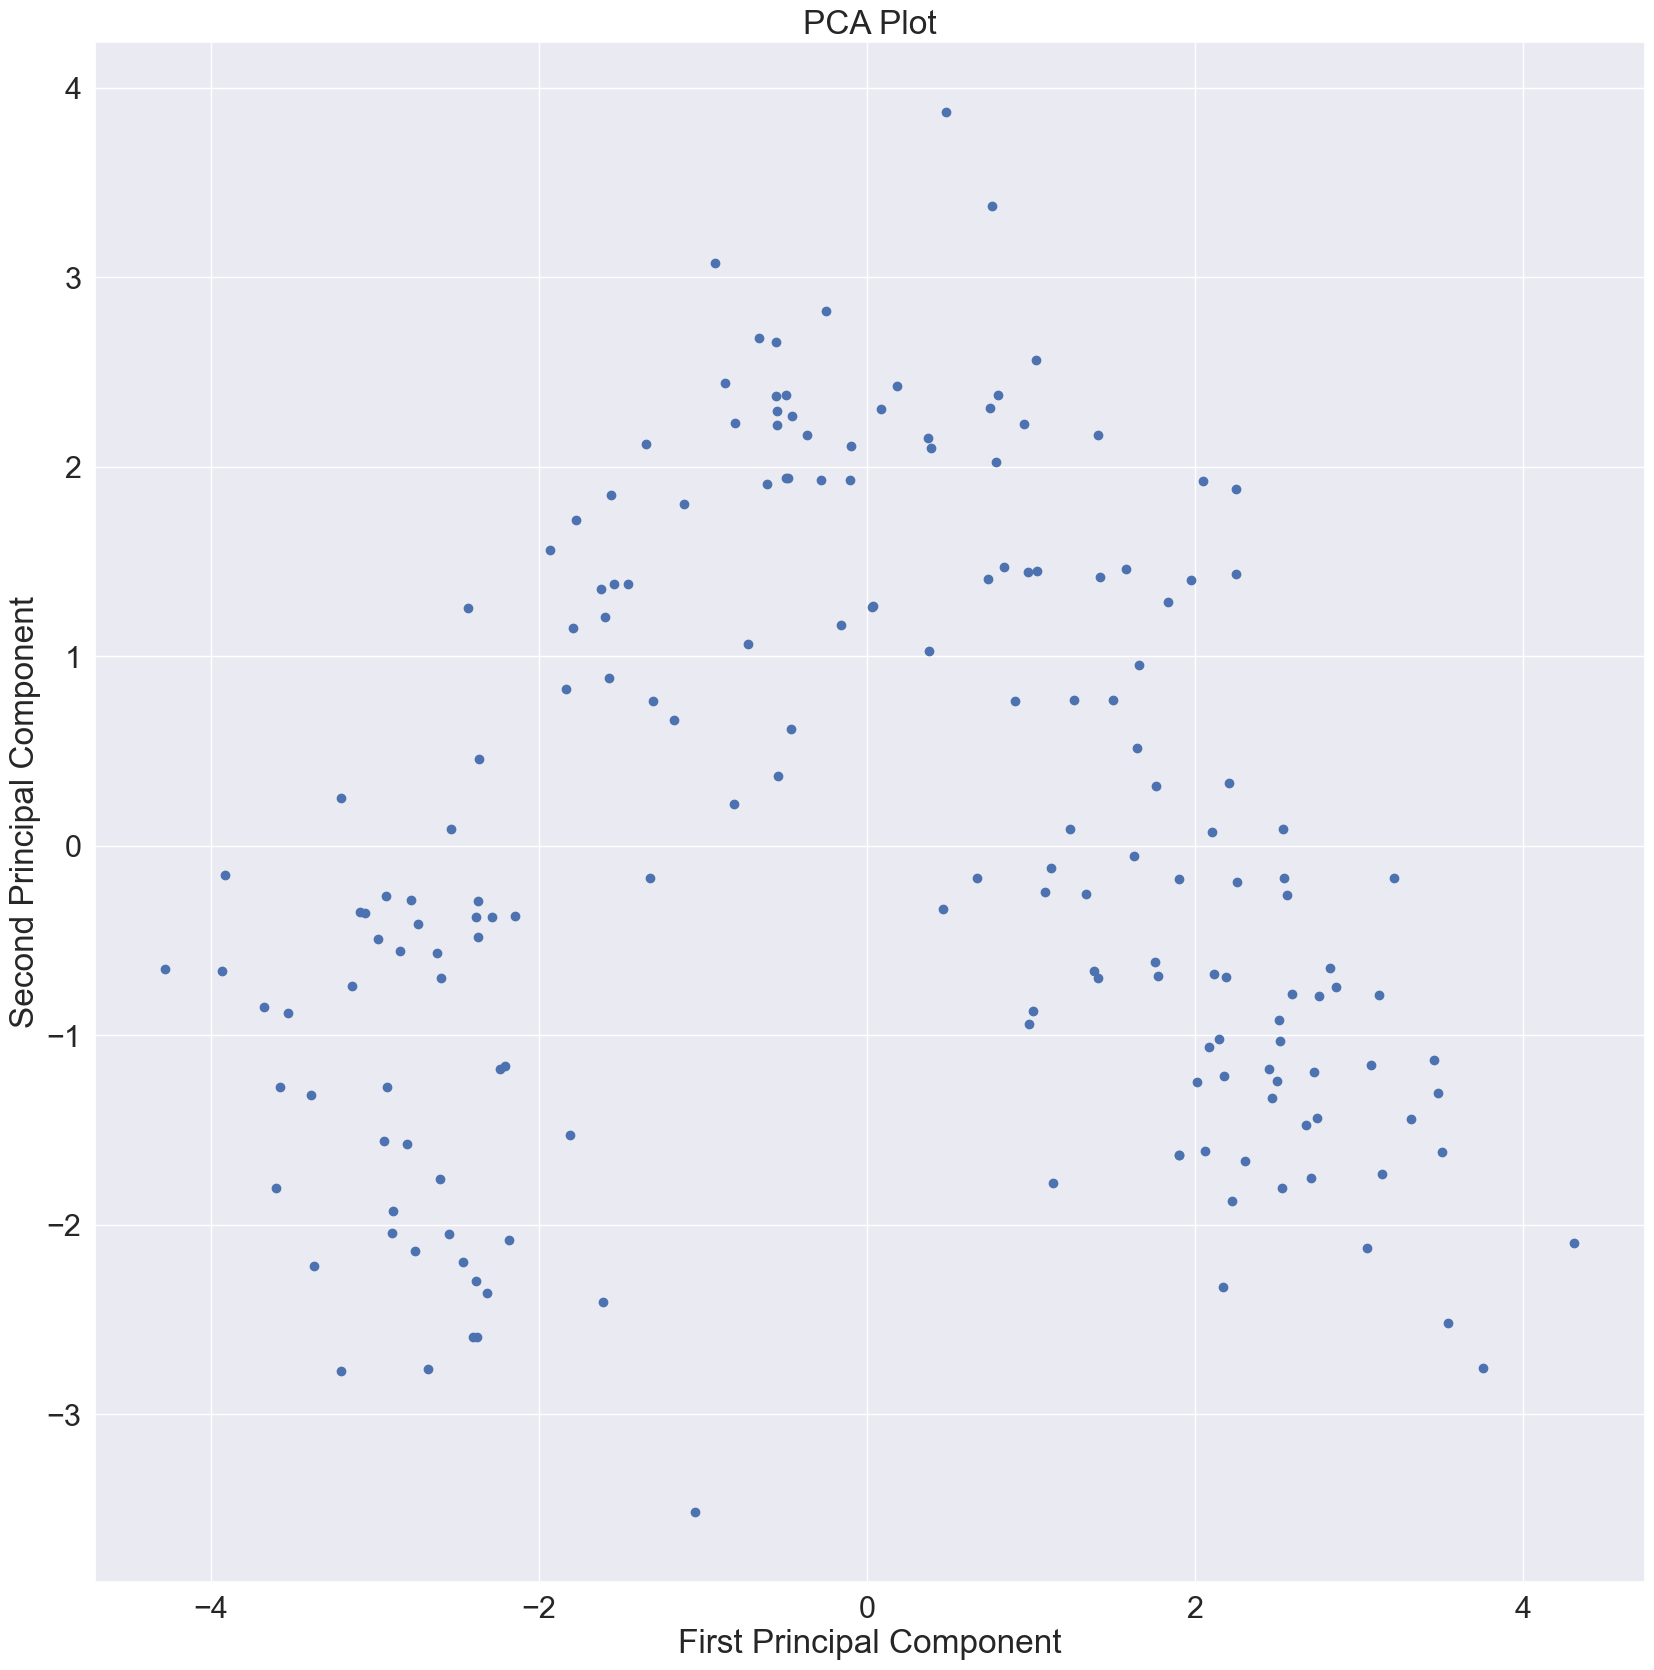

In [17]:
# Plotting PCA, n_components = 2
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

# Clustering 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

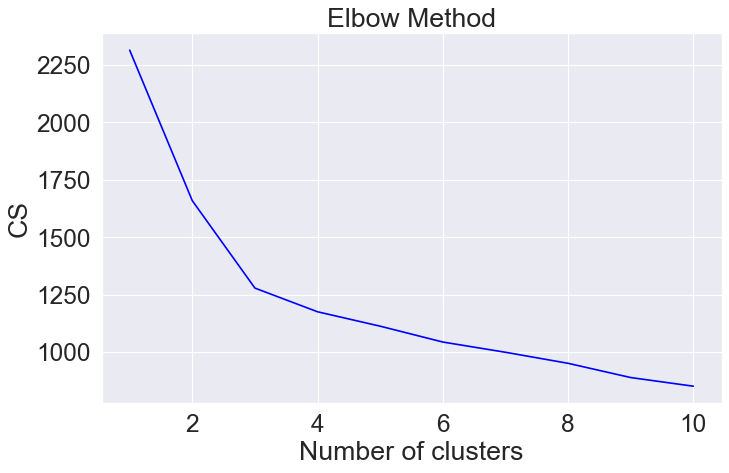

In [18]:
#Elbow method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1, 11), cs, color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

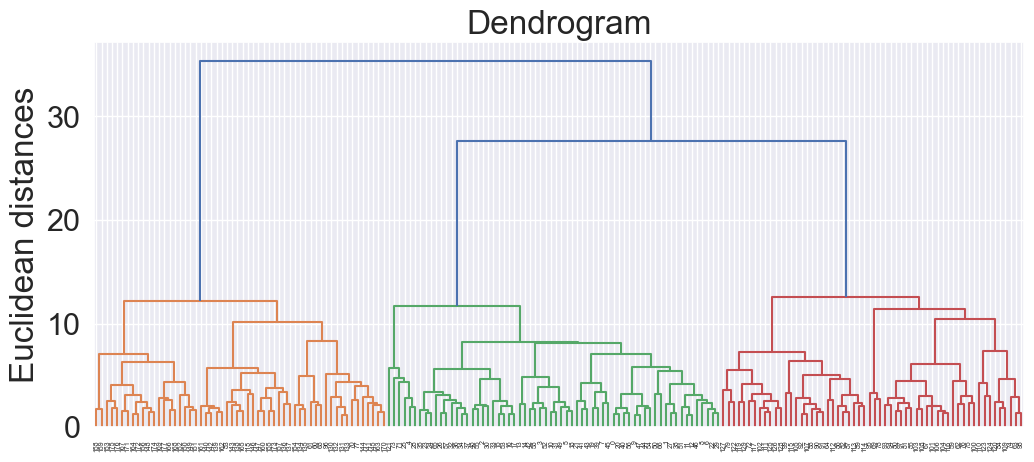

In [19]:
#Dendrogram
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
#K_Means
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
clusters = kmeans.fit_predict(data_scaled)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Principal Component 2')

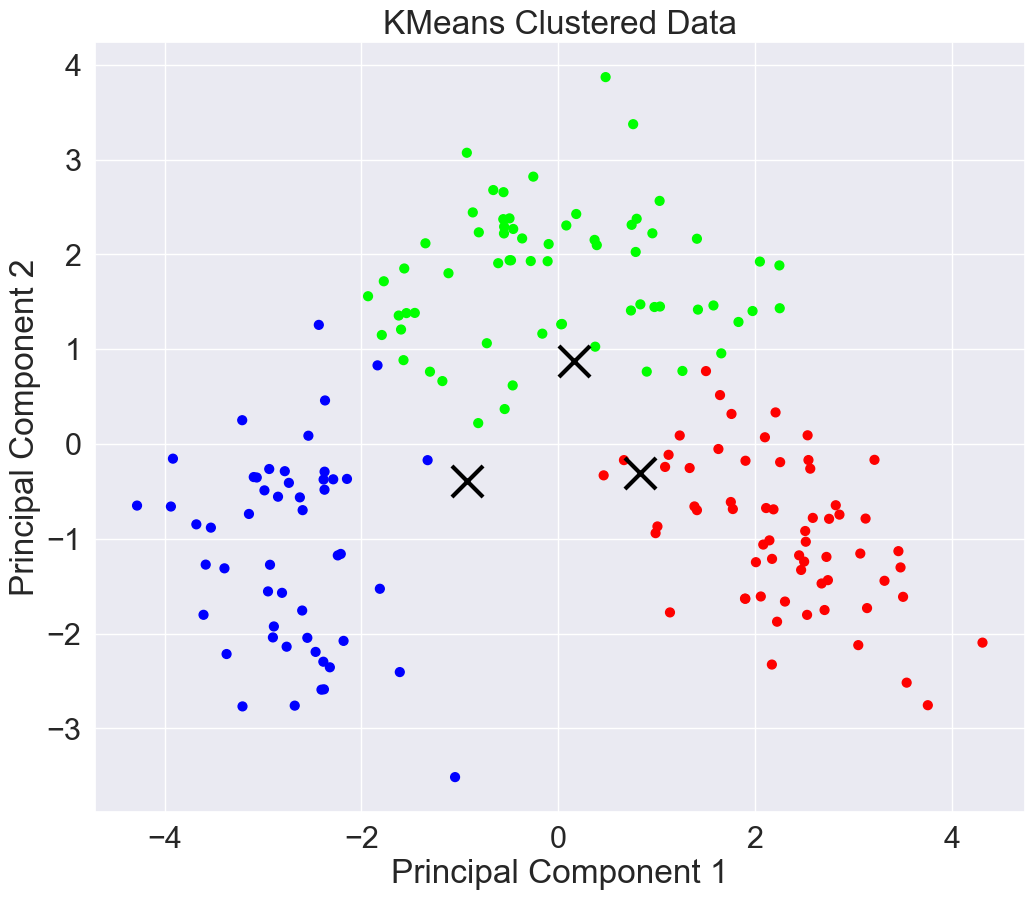

In [23]:
# Plotting PCA in color
plt.figure(figsize=(12,10))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
plt.title('KMeans Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [24]:
#t_SNE
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(data_scaled)
tsne_data = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

Text(0, 0.5, 't-SNE Component 2')

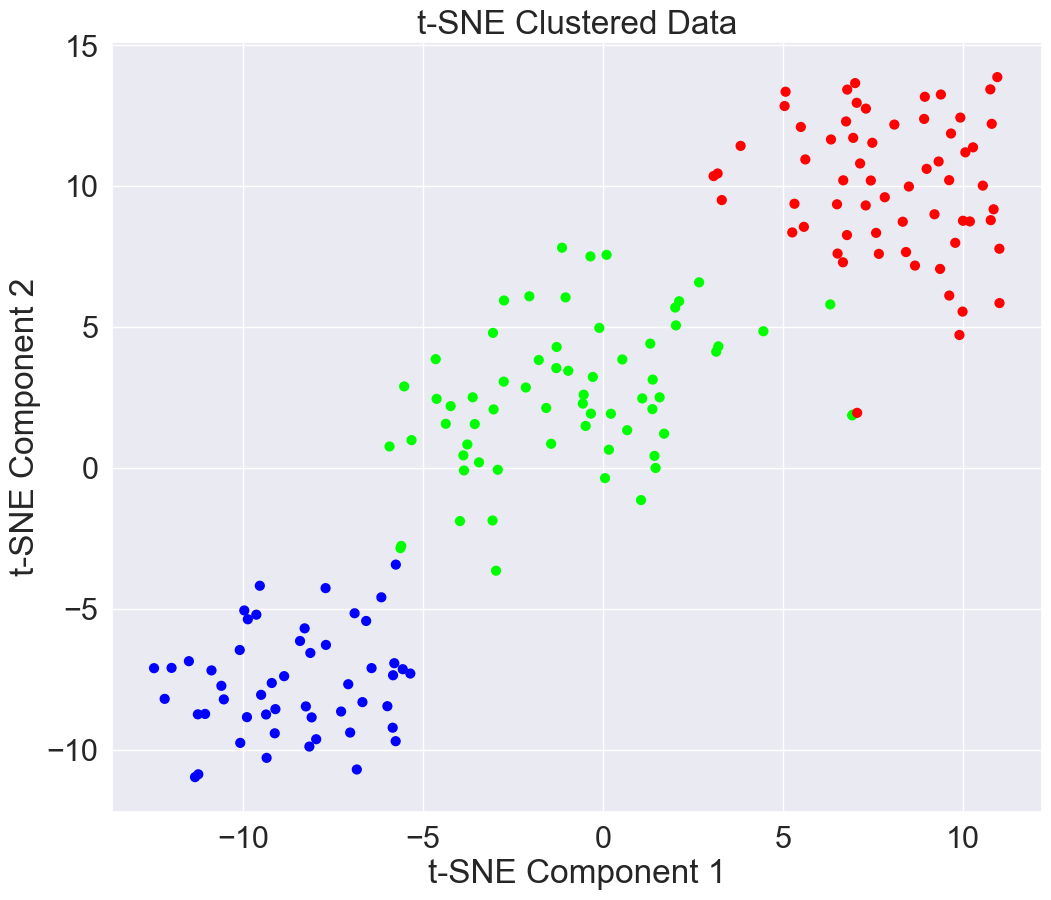

In [25]:
# Plotting t-SNE Clusters
plt.figure(figsize=(12,10))
plt.scatter(tsne_data.iloc[:,0], tsne_data.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.title('t-SNE Clustered Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')